<a href="https://colab.research.google.com/github/abd-ui/Makeen/blob/main/week4/decision%20tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(0)

# Number of data points
n = 10

# Generating random data for the variables
credit_scores = np.random.randint(300, 851, size=n)
income = np.random.randint(2000, 10001, size=n)
loan_amount = np.random.randint(5000, 30001, size=n)
loan_terms = np.random.choice(['short-term', 'long-term'], size=n)
employment_status = np.random.choice(['employed', 'self-employed', 'unemployed', 'other'], size=n)
previous_delinquencies = np.random.choice(['yes', 'no'], size=n)
loan_approval = np.random.choice(['yes', 'no'], size=n)

# Creating the dataset
data = {
    'Credit score': credit_scores,
    'Income': income,
    'Loan amount': loan_amount,
    'Loan term': loan_terms,
    'Employment status': employment_status,
    'Previous delinquencies': previous_delinquencies,
    'Loan approval': loan_approval
}

df = pd.DataFrame(data)


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Preprocessing categorical variables
label_encoder = LabelEncoder()
df['Loan term'] = label_encoder.fit_transform(df['Loan term'])
df['Employment status'] = label_encoder.fit_transform(df['Employment status'])
df['Previous delinquencies'] = label_encoder.fit_transform(df['Previous delinquencies'])

# Splitting the dataset into features (X) and target variable (y)
X = df.drop('Loan approval', axis=1)
y = df['Loan approval']

# Creating the decision tree classifier
classifier = DecisionTreeClassifier()
classifier.fit(X, y)


DecisionTreeClassifier()

In [12]:
from sklearn.metrics import accuracy_score

# Predicting the loan approvals
predictions = classifier.predict(X)

# Calculating the accuracy of the model
accuracy = accuracy_score(y, predictions)
print("Accuracy:", accuracy)


Accuracy: 1.0


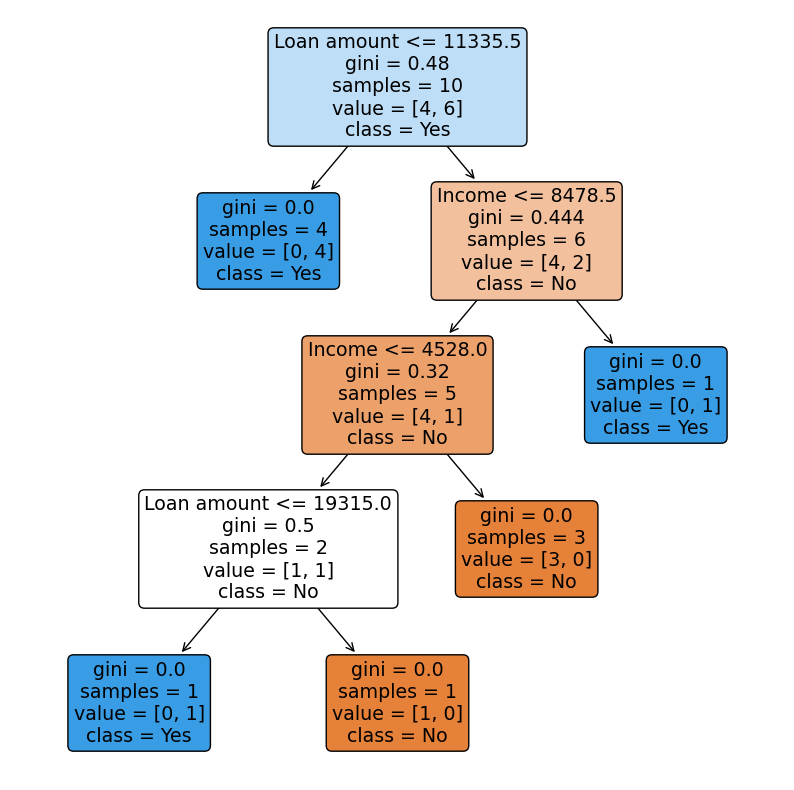

In [13]:
import matplotlib.pyplot as plt
from sklearn import tree

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the decision tree
tree.plot_tree(classifier, feature_names=X.columns, class_names=['No', 'Yes'],
               filled=True, rounded=True, ax=ax)

# Show the plot
plt.show()
